In [4]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

# Load dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Reshape data for CNN input (adding channel dimension)
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Splitting dataset properly
train_X1, val_X = train_X[:50000], train_X[50000:]  # 50,000 for training, 10,000 for validation
train_Y1, val_Y = train_Y[:50000], train_Y[50000:]

# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y1, num_classes=10)
val_Y_one_hot = to_categorical(val_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# Build CNN Model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))  # Added missing activation function
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_X1, train_Y_one_hot, epochs=10, batch_size=64, validation_data=(val_X, val_Y_one_hot))

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print(f"Test Accuracy: {test_acc:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.7335 - loss: 0.7415 - val_accuracy: 0.8461 - val_loss: 0.4159
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.8703 - loss: 0.3596 - val_accuracy: 0.8754 - val_loss: 0.3360
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.8886 - loss: 0.3033 - val_accuracy: 0.8877 - val_loss: 0.3093
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.8995 - loss: 0.2717 - val_accuracy: 0.8848 - val_loss: 0.3104
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.9118 - loss: 0.2424 - val_accuracy: 0.8943 - val_loss: 0.2864
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.9197 - loss: 0.2168 - val_accuracy: 0.9071 - val_loss: 0.2596
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.9253 - loss: 0.2013 - val_accuracy: 0.9085 - val_loss: 0.2591
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.9324 - loss: 0.1812 - 

# Q2

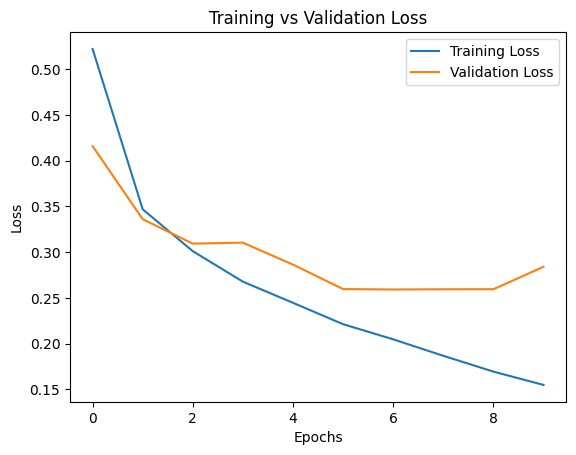

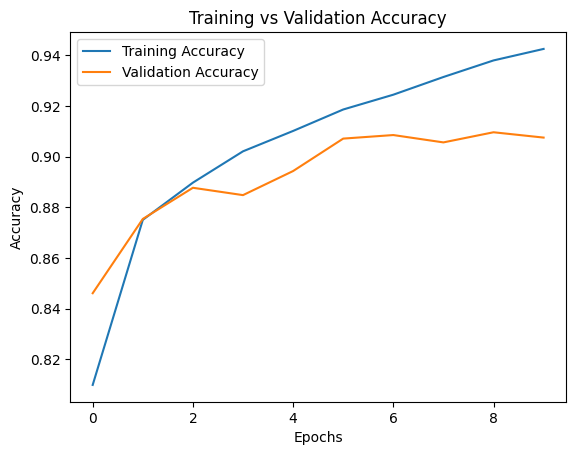

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8980 - loss: 0.3073
Test Accuracy: 0.8972


In [6]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print(f"Test Accuracy: {test_acc:.4f}")

# Q3

In [7]:
# Evaluate the model on the first 100 test samples
score = model.evaluate(test_X[:100], test_Y_one_hot[:100], verbose=1)

# Print the accuracy
print('\nKeras CNN Accuracy on Test Set (first 100 samples):', score[1], '\n')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8977 - loss: 0.3431

Keras CNN Accuracy on Test Set (first 100 samples): 0.8899999856948853 



# Q4

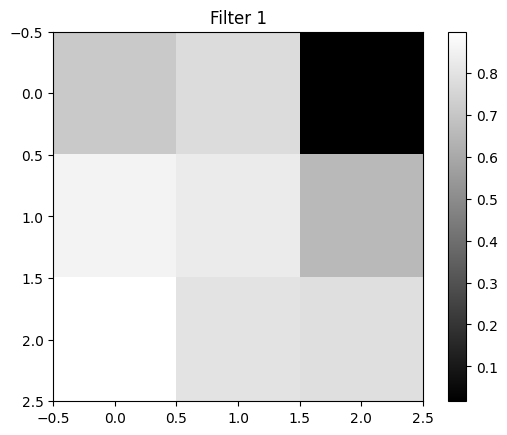

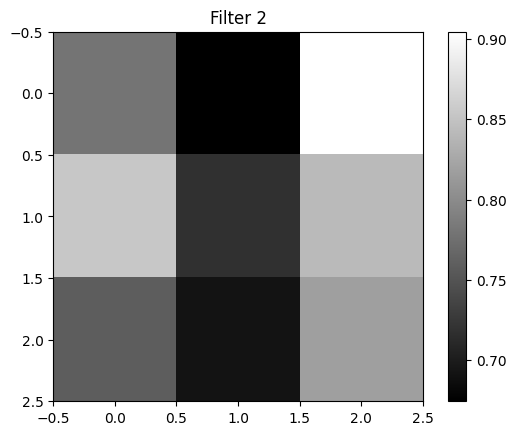

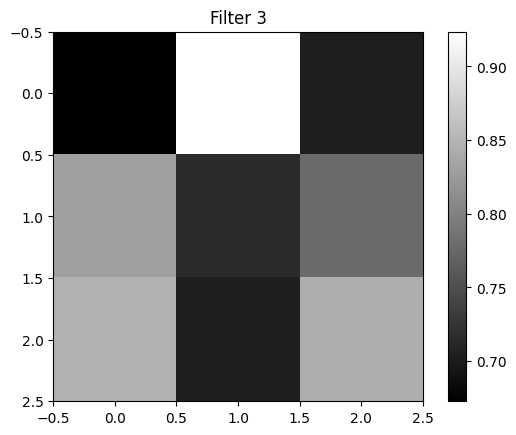

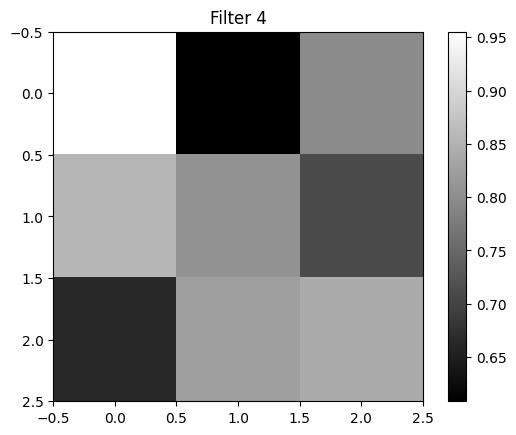

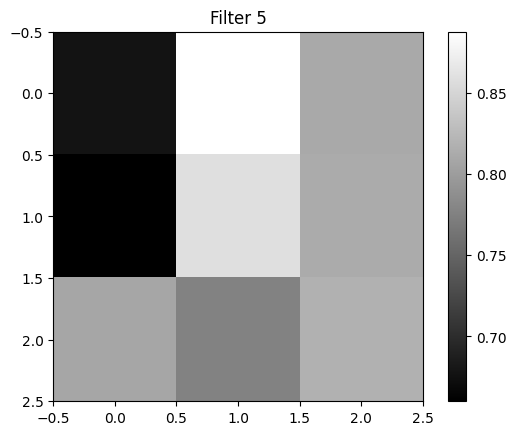

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Get the filters and biases from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to range 0-1 for better visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Display the first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.colorbar()
    plt.show()


# Q5

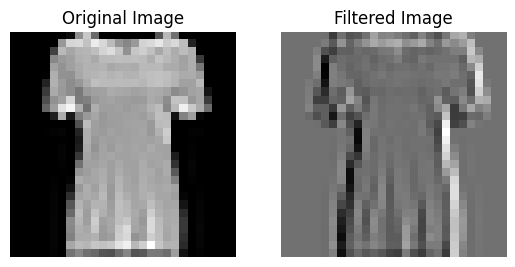

In [9]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Select an image from the training dataset
im = train_X[10].reshape(28, 28)  # Ensure it's in 2D format

# Get filters from the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Select a specific filter (e.g., the second filter)
selected_filter = filters[:, :, 0, 1]  # Extract a 3x3 filter

# Apply 2D convolution to the image using the selected filter
filtered_image = signal.convolve2d(im, selected_filter, boundary='symm', mode='same')

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Plot filtered output
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")

plt.show()


# Q6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7239 - loss: 0.7507 - val_accuracy: 0.8407 - val_loss: 0.4294
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8370 - loss: 0.4445 - val_accuracy: 0.8629 - val_loss: 0.3743
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8548 - loss: 0.3928 - val_accuracy: 0.8606 - val_loss: 0.3790
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8647 - loss: 0.3729 - val_accuracy: 0.8735 - val_loss: 0.3492
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8718 - loss: 0.3514 - val_accuracy: 0.8702 - val_loss: 0.3487
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8745 - loss: 0.3374 - val_accuracy: 0.8751 - val_loss: 0.3400
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8799 - loss: 0.3239 - val_accuracy: 0.8840 - val_loss: 0.3295
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8867 - loss: 0.3058 - 

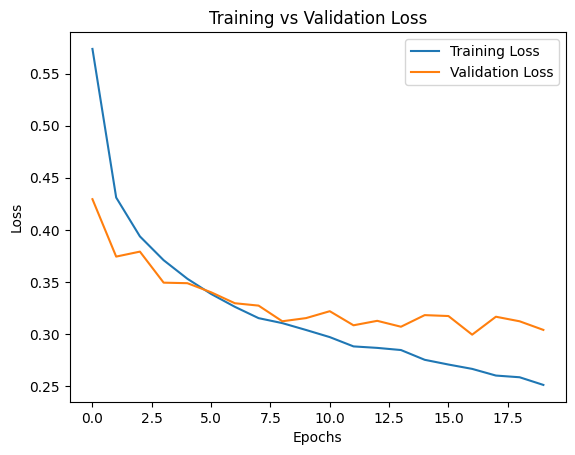

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(train_X, train_Y), (test_X, test_Y) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0,1]
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Flatten images from (28,28) to (784,)
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

# Convert labels to One-Hot Encoding
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Split validation set from training set
val_X = train_X[50000:]
val_Y = train_Y_one_hot[50000:]

train_X = train_X[:50000]
train_Y_one_hot = train_Y_one_hot[:50000]

# Build the Fully Connected Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes output

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=20,
                    validation_data=(val_X, val_Y), verbose=1)

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Q7

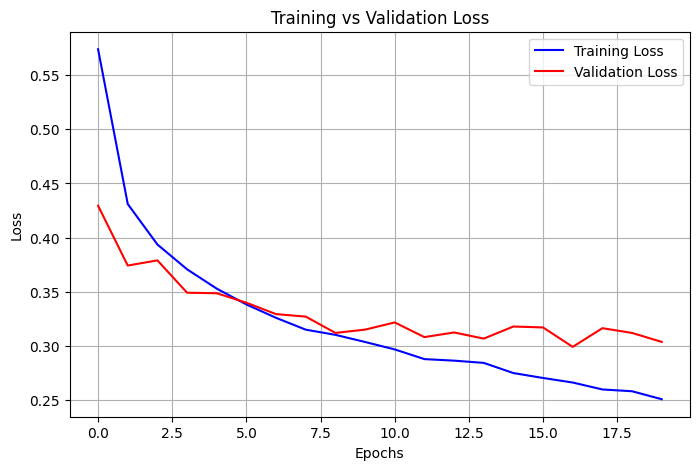

In [11]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


# Q8

In [12]:
# Evaluate the model on the test set
score = model.evaluate(test_X, test_Y_one_hot, verbose=1)

# Print Accuracy
print(f"\nTest Accuracy: {score[1]*100:.2f}%")

# Print Loss
print(f"Test Loss: {score[0]:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8868 - loss: 0.3270

Test Accuracy: 88.74%
Test Loss: 0.3281
